# Analisis Kelayakan Pendidikan di Indonesia

## Library

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import streamlit as st
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from adjustText import adjust_text


## Data Wrangling

### Gathering Data

In [28]:
file_path = 'data/kelayakan-pendidikan-indonesia.csv'
data = pd.read_csv(file_path)

data.head()

,Provinsi,Sekolah,Siswa,Mengulang,Putus Sekolah,Kepala Sekolah dan Guru(<S1),Kepala Sekolah dan Guru(≥ S1),Tenaga Kependidikan(SM),Tenaga Kependidikan(>SM),Rombongan Belajar,Ruang kelas(baik),Ruang kelas(rusak ringan),Ruang kelas(rusak sedang),Ruang kelas(rusak berat),Unnamed: 14
0,Prov. D.K.I. Jakarta,2224,756455,1202,869,1089,38305,6967,1569,27830,23320,3886,717,345,NaN
1,Prov. Jawa Barat,19553,4487262,4778,5675,5007,209252,27487,3353,169704,59592,46006,34432,14397,NaN
2,Prov. Jawa Tengah,18618,2595050,6909,2399,2337,167535,21325,2473,127266,51050,42356,26321,13457,NaN
3,Prov. D.I. Yogyakarta,1846,270610,357,75,326,19771,4536,866,13719,8217,3878,1827,548,NaN
4,Prov. Jawa Timur,18980,2530849,4694,3327,2950,180465,21116,3818,134724,58679,42896,24218,14389,NaN


- **Insight:** Tampilan awal beberapa baris pertama data ini membantu dalam memahami bagaimana data disusun (misal: kolom, tipe data, dsb.) dan memberikan konteks awal mengenai informasi yang terkandung dalam dataset.

### Assessing Data

In [29]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

print("Tipe data:\n", data.dtypes)

print(data.describe())

Missing values:
 Provinsi                          0
Sekolah                           0
Siswa                             0
Mengulang                         0
Putus Sekolah                     0
Kepala Sekolah dan Guru(<S1)      0
Kepala Sekolah dan Guru(≥ S1)     0
Tenaga Kependidikan(SM)           0
Tenaga Kependidikan(>SM)          0
Rombongan Belajar                 0
Ruang kelas(baik)                 0
Ruang kelas(rusak ringan)         0
Ruang kelas(rusak sedang)         0
Ruang kelas(rusak berat)          0
Unnamed: 14                      39
dtype: int64
Tipe data:
 Provinsi                          object
Sekolah                            int64
Siswa                              int64
Mengulang                          int64
Putus Sekolah                      int64
Kepala Sekolah dan Guru(<S1)       int64
Kepala Sekolah dan Guru(≥ S1)      int64
Tenaga Kependidikan(SM)            int64
Tenaga Kependidikan(>SM)           int64
Rombongan Belajar                  int64
Ruang ke

- **Insight:** Dari proses ini, saya bisa mengetahui apakah ada missing values di dataset yang perlu diatasi, misalnya, apakah ada kolom yang mengandung nilai kosong atau null. Juga, saya dapat memeriksa apakah tipe data di setiap kolom sesuai dengan jenis informasi yang diwakilinya (misalnya, angka harus berupa integer atau float). Distribusi data memberikan gambaran tentang bagaimana setiap variabel (misalnya, jumlah sekolah, siswa, guru, dll.) tersebar dan apakah ada nilai ekstrim atau tidak biasa.

### Cleaning Data

In [30]:
data = data.fillna(0)

numeric_columns = ['Sekolah', 'Siswa', 'Mengulang', 'Putus Sekolah', 
                   'Kepala Sekolah dan Guru(<S1)', 'Kepala Sekolah dan Guru(≥ S1)',
                   'Tenaga Kependidikan(SM)', 'Tenaga Kependidikan(>SM)',
                   'Rombongan Belajar', 'Ruang kelas(baik)', 
                   'Ruang kelas(rusak ringan)', 'Ruang kelas(rusak sedang)', 'Ruang kelas(rusak berat)']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

data['Provinsi'] = data['Provinsi'].str.strip()

print(data.head())

                Provinsi  Sekolah    Siswa  Mengulang  Putus Sekolah  \
0   Prov. D.K.I. Jakarta     2224   756455       1202            869   
1       Prov. Jawa Barat    19553  4487262       4778           5675   
2      Prov. Jawa Tengah    18618  2595050       6909           2399   
3  Prov. D.I. Yogyakarta     1846   270610        357             75   
4       Prov. Jawa Timur    18980  2530849       4694           3327   

   Kepala Sekolah dan Guru(<S1)  Kepala Sekolah dan Guru(≥ S1)  \
0                          1089                          38305   
1                          5007                         209252   
2                          2337                         167535   
3                           326                          19771   
4                          2950                         180465   

   Tenaga Kependidikan(SM)  Tenaga Kependidikan(>SM)  Rombongan Belajar  \
0                     6967                      1569              27830   
1                   

- **Insight:** Setelah membersihkan data, saya memastikan dataset bebas dari kolom yang tidak diperlukan, seperti kolom kosong atau tidak relevan. Missing values yang mungkin mengganggu analisis telah diisi, dan tipe data diubah agar sesuai dengan konteks setiap variabel. Nama provinsi juga dibersihkan untuk menghindari kesalahan dalam pengelompokan dan analisis lebih lanjut. Ini berarti saya memiliki data yang lebih bersih, lebih konsisten, dan siap untuk dianalisis tanpa hambatan teknis.

## Exploratory Data Analysis (EDA)

### Statistik Deskriptif

In [31]:
descriptive_stats = data[numeric_columns].describe()
print("Statistik Deskriptif:\n", descriptive_stats)

Statistik Deskriptif:
             Sekolah         Siswa    Mengulang  Putus Sekolah  \
count     39.000000  3.900000e+01    39.000000      39.000000   
mean    3817.487179  6.170439e+05  2840.820513    1155.051282   
std     4862.821186  8.650352e+05  2312.422413    1167.778659   
min      124.000000  1.778900e+04    56.000000      75.000000   
25%      956.500000  1.431760e+05  1257.500000     466.000000   
50%     2347.000000  3.123520e+05  2049.000000     835.000000   
75%     4326.500000  7.098810e+05  4212.000000    1279.500000   
max    19553.000000  4.487262e+06  9801.000000    5675.000000   

       Kepala Sekolah dan Guru(<S1)  Kepala Sekolah dan Guru(≥ S1)  \
count                     39.000000                      39.000000   
mean                    1311.923077                   40251.846154   
std                     1016.534991                   48430.707661   
min                       76.000000                     450.000000   
25%                      593.000000      

- **Insight:** Dari sini, saya bisa mengetahui rata-rata, median, dan variasi dalam jumlah sekolah, siswa, dan faktor pendidikan lainnya. Sebagai contoh, saya dapat mengetahui provinsi mana yang memiliki rata-rata siswa tertinggi atau distribusi jumlah sekolah di seluruh provinsi.

### Korelasi Antar Variabel

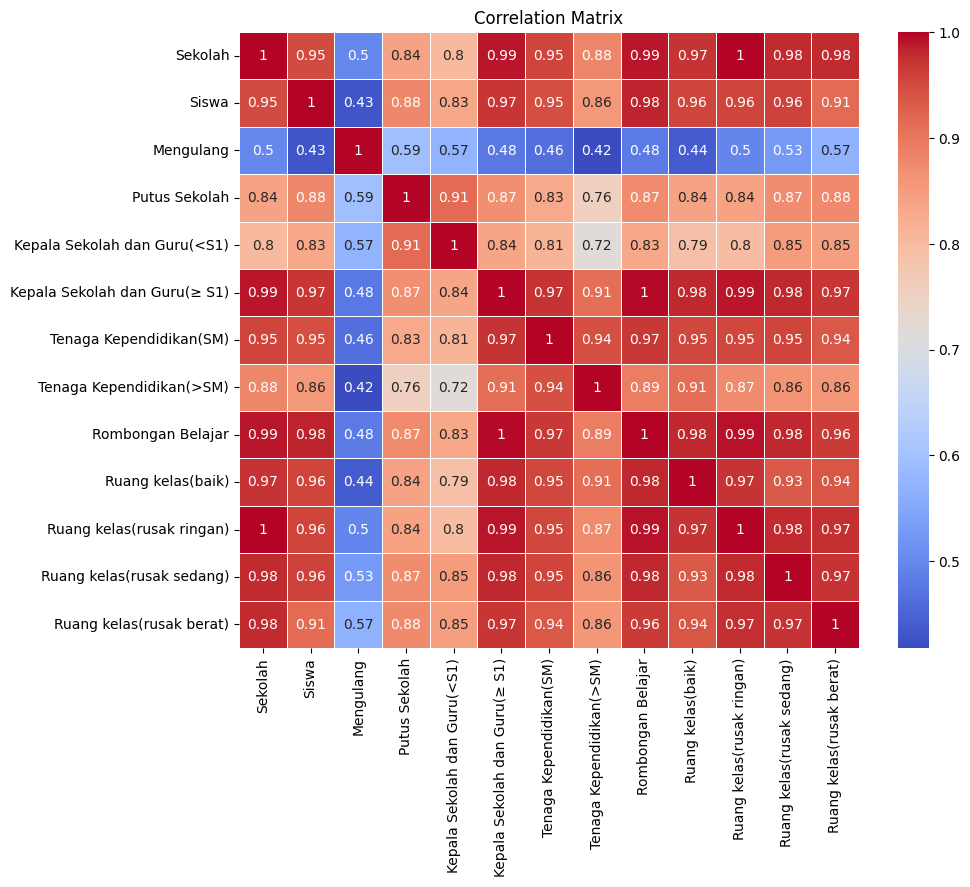

In [43]:
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


- **Insight:** Korelasi antar variabel menunjukkan hubungan antara berbagai faktor dalam dataset, seperti apakah ada korelasi antara jumlah siswa dan jumlah guru atau antara kualitas ruang kelas dengan angka putus sekolah. Korelasi ini membantu saya dalam memahami hubungan yang lebih dalam antara variabel-variabel penting, misalnya, jika saya menemukan korelasi positif yang kuat antara kondisi ruang kelas yang buruk dan angka putus sekolah, saya bisa menyarankan perbaikan infrastruktur untuk menurunkan angka putus sekolah.

### Mengidentifikasi Outliers

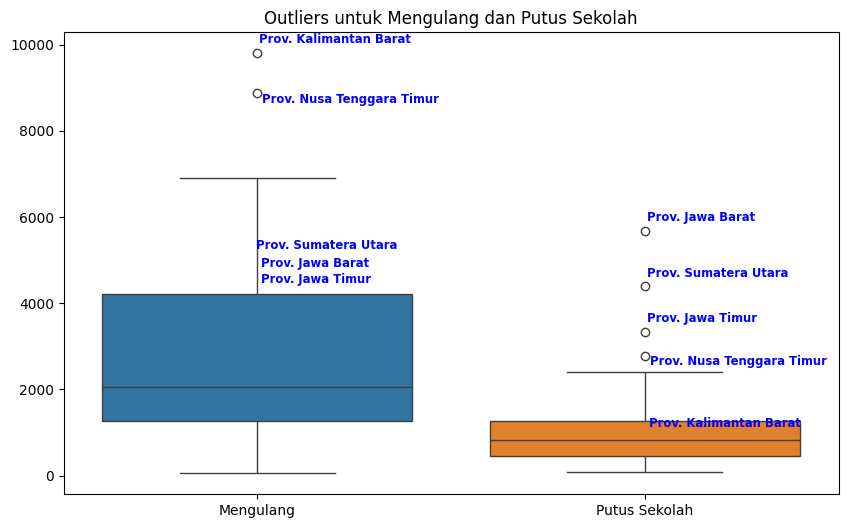

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

Q1 = data[['Mengulang', 'Putus Sekolah']].quantile(0.25)
Q3 = data[['Mengulang', 'Putus Sekolah']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Mengulang'] < lower_bound['Mengulang']) | (data['Mengulang'] > upper_bound['Mengulang']) |
                (data['Putus Sekolah'] < lower_bound['Putus Sekolah']) | (data['Putus Sekolah'] > upper_bound['Putus Sekolah'])]

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data[['Mengulang', 'Putus Sekolah']])

texts = []

for i in range(outliers.shape[0]):
    # Untuk 'Mengulang'
    texts.append(plt.text(0, outliers['Mengulang'].iloc[i], outliers['Provinsi'].iloc[i], 
                          horizontalalignment='left', color='blue', size='small', weight='semibold'))
    # Untuk 'Putus Sekolah'
    texts.append(plt.text(1, outliers['Putus Sekolah'].iloc[i], outliers['Provinsi'].iloc[i], 
                          horizontalalignment='left', color='blue', size='small', weight='semibold'))

adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='->', color='white', lw=0.5))

plt.title("Outliers untuk Mengulang dan Putus Sekolah")
plt.show()

- **Insight:** Dari hasil identifikasi outliers, saya dapat mengetahui bahwa ada beberapa provinsi dengan angka siswa mengulang dan putus sekolah yang jauh di luar rentang normal. Provinsi-provinsi ini membutuhkan intervensi pendidikan khusus, seperti peningkatan kualitas pengajaran atau infrastruktur sekolah.

## Visualization & Explanatory Analysis

### Bar Chart untuk Jumlah Siswa dan Sekolah per Provinsi

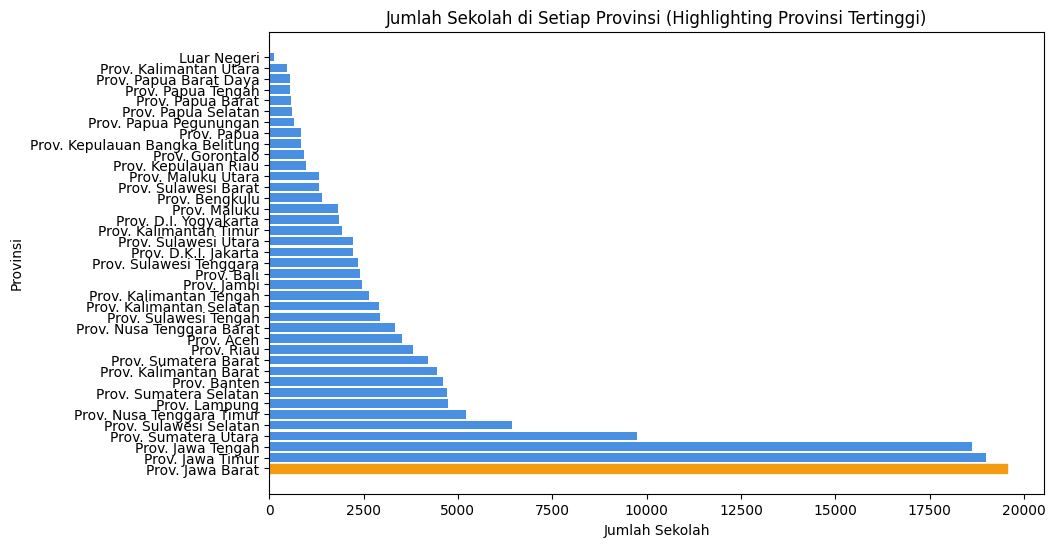

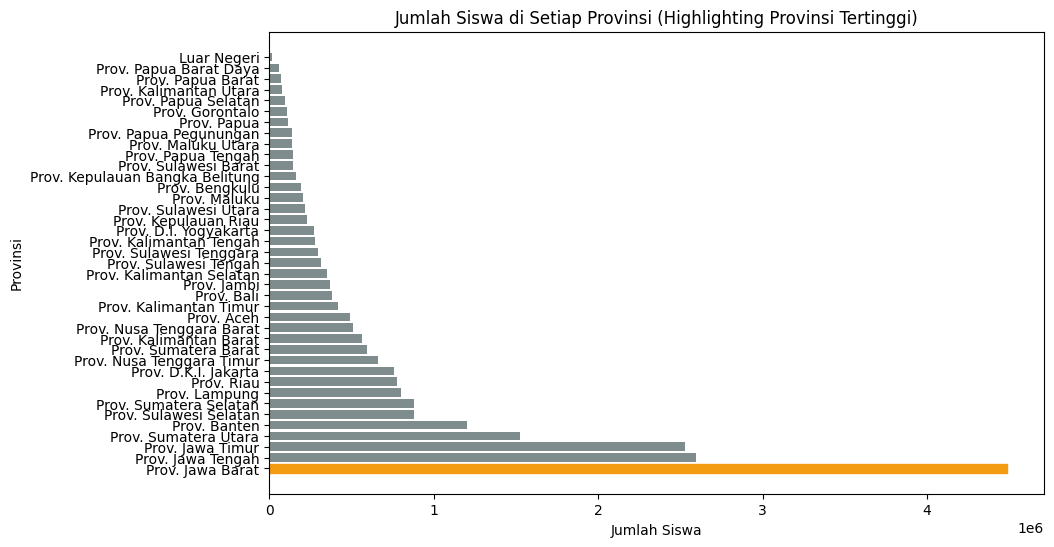

In [44]:
data_sorted_schools = data.sort_values(by='Sekolah', ascending=False)
data_sorted_students = data.sort_values(by='Siswa', ascending=False)

primary_color = '#4a90e2'  #
secondary_color = '#7f8c8d'  #

highlight_color = '#f39c12'  #

plt.figure(figsize=(10, 6))
bars = plt.barh(data_sorted_schools['Provinsi'], data_sorted_schools['Sekolah'], color=primary_color)

bars[0].set_color(highlight_color)

plt.xlabel('Jumlah Sekolah')
plt.ylabel('Provinsi')
plt.title('Jumlah Sekolah di Setiap Provinsi')
plt.show()

# Bar chart untuk jumlah siswa per provinsi
plt.figure(figsize=(10, 6))
bars = plt.barh(data_sorted_students['Provinsi'], data_sorted_students['Siswa'], color=secondary_color)

# Highlight provinsi dengan jumlah siswa tertinggi
bars[0].set_color(highlight_color)

plt.xlabel('Jumlah Siswa')
plt.ylabel('Provinsi')
plt.title('Jumlah Siswa di Setiap Provinsi')
plt.show()

- **Insight:** Dengan highlighting pada bar chart, saya bisa langsung mengidentifikasi provinsi yang memiliki jumlah sekolah dan jumlah siswa tertinggi. Provinsi dengan bar warna oranye terang menunjukkan provinsi yang paling menonjol dalam jumlah sekolah dan siswa.

### Stacked Bar Chart untuk Kondisi Ruang Kelas

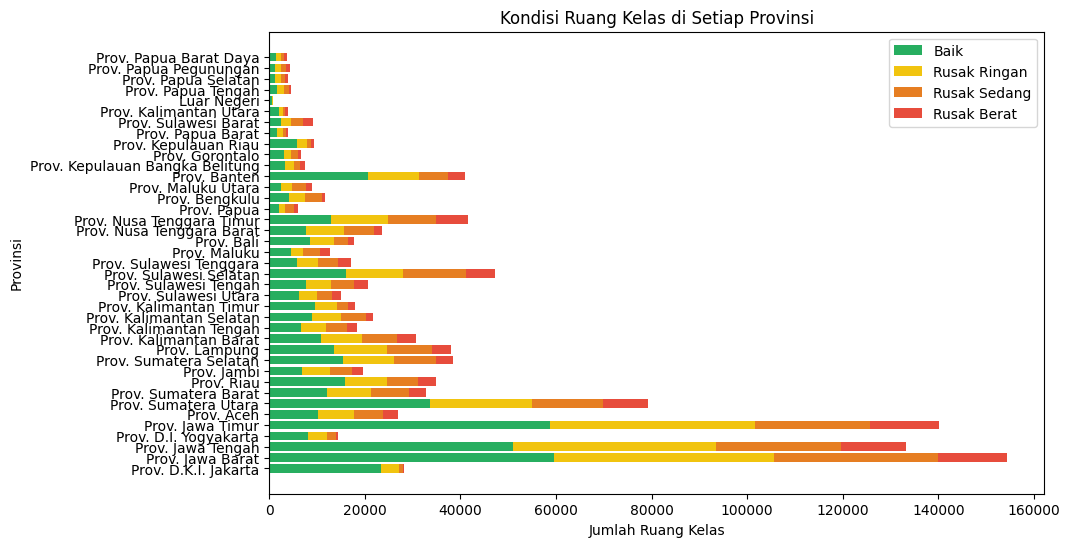

In [46]:
plt.figure(figsize=(10, 6))
provinsi = data['Provinsi']
baik = data['Ruang kelas(baik)']
rusak_ringan = data['Ruang kelas(rusak ringan)']
rusak_sedang = data['Ruang kelas(rusak sedang)']
rusak_berat = data['Ruang kelas(rusak berat)']

baik_color = '#27ae60'
rusak_ringan_color = '#f1c40f'
rusak_sedang_color = '#e67e22'  
rusak_berat_color = '#e74c3c'  

plt.barh(provinsi, baik, label='Baik', color=baik_color)
plt.barh(provinsi, rusak_ringan, left=baik, label='Rusak Ringan', color=rusak_ringan_color)
plt.barh(provinsi, rusak_sedang, left=baik + rusak_ringan, label='Rusak Sedang', color=rusak_sedang_color)
plt.barh(provinsi, rusak_berat, left=baik + rusak_ringan + rusak_sedang, label='Rusak Berat', color=rusak_berat_color)

plt.xlabel('Jumlah Ruang Kelas')
plt.ylabel('Provinsi')
plt.title('Kondisi Ruang Kelas di Setiap Provinsi')
plt.legend()
plt.show()

- **Insight:** Warna hijau hingga merah pada stacked bar chart menunjukkan kondisi ruang kelas dari baik hingga rusak berat di tiap provinsi. Dari sini, saya bisa melihat provinsi mana yang memiliki ruang kelas rusak berat dalam jumlah signifikan.

### Scatter Plot untuk Hubungan Mengulang dan Kondisi Ruang Kelas

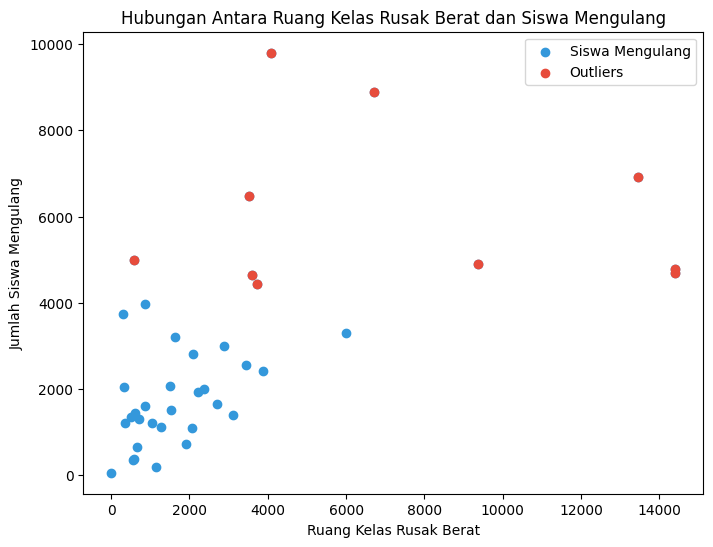

In [149]:
plt.figure(figsize=(8, 6))

plt.scatter(data['Ruang kelas(rusak berat)'], data['Mengulang'], color='#3498db', label='Siswa Mengulang')
plt.scatter(data['Ruang kelas(rusak berat)'][data['Mengulang'] > data['Mengulang'].quantile(0.75)], 
            data['Mengulang'][data['Mengulang'] > data['Mengulang'].quantile(0.75)], 
            color='#e74c3c', label='Outliers')

plt.xlabel('Ruang Kelas Rusak Berat')
plt.ylabel('Jumlah Siswa Mengulang')
plt.title('Hubungan Antara Ruang Kelas Rusak Berat dan Siswa Mengulang')
plt.legend()
plt.show()


- **Insight:** Scatter plot ini menunjukkan bahwa ada provinsi dengan jumlah ruang kelas rusak berat yang tinggi memiliki hubungan dengan jumlah siswa mengulang yang lebih besar, terutama outliers yang di-highlight dengan warna merah.

## 8. Analisis Lanjutan

### Regresi Linier Tanpa Intercept (Dimulai dari 0) untuk Menilai Pengaruh Ruang Kelas Rusak terhadap Siswa Mengulang

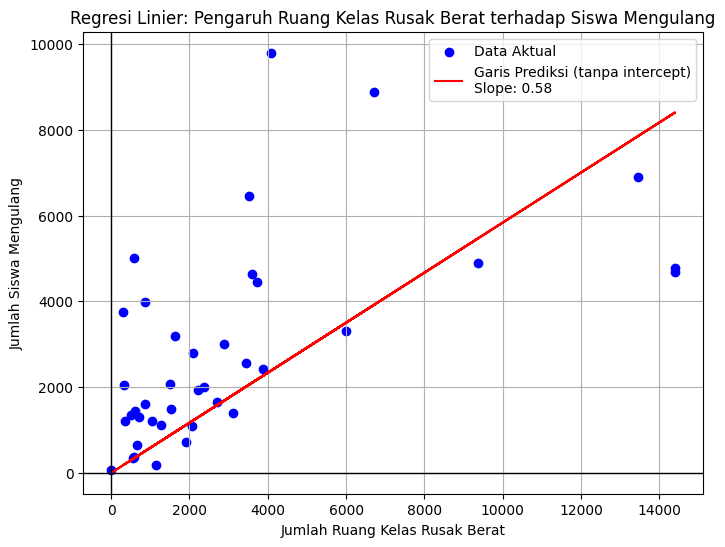

In [53]:
X = data[['Ruang kelas(rusak berat)']]
y = data['Mengulang']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Aktual')  # Titik data aktual
plt.plot(X, y_pred, color='red', label=f'Garis Prediksi (tanpa intercept)\nSlope: {model.coef_[0]:.2f}')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Jumlah Ruang Kelas Rusak Berat')
plt.ylabel('Jumlah Siswa Mengulang')
plt.title('Regresi Linier: Pengaruh Ruang Kelas Rusak Berat terhadap Siswa Mengulang')
plt.legend()
plt.grid(True)
plt.show()

- **Insight:** Dari regresi linier ini, saya bisa melihat hubungan langsung antara jumlah ruang kelas rusak berat dan jumlah siswa yang mengulang. Dengan memaksa garis regresi dimulai dari nol, hasilnya menunjukkan bahwa semakin banyak ruang kelas yang rusak, semakin banyak siswa yang mengulang.

### K-Means Clustering untuk Mengelompokkan Provinsi Berdasarkan Kondisi Pendidikan

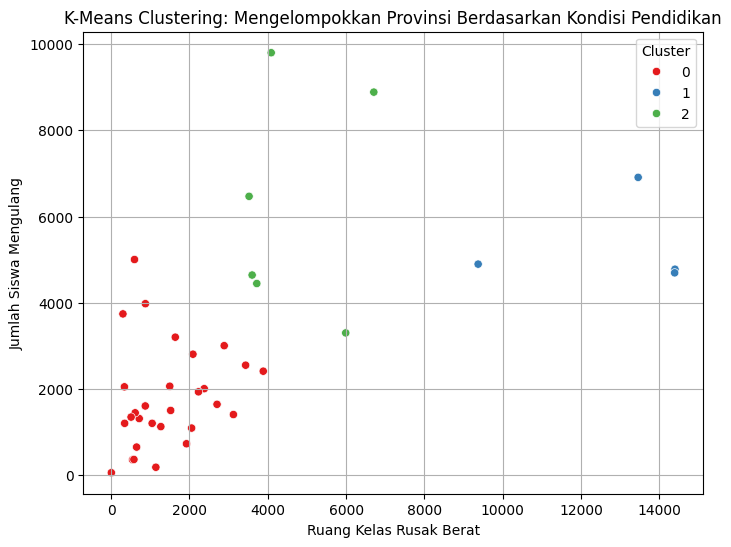

Provinsi di Cluster 0:
           Prov. D.K.I. Jakarta
          Prov. D.I. Yogyakarta
                     Prov. Aceh
                    Prov. Jambi
                  Prov. Lampung
        Prov. Kalimantan Tengah
       Prov. Kalimantan Selatan
         Prov. Kalimantan Timur
           Prov. Sulawesi Utara
          Prov. Sulawesi Tengah
        Prov. Sulawesi Tenggara
                   Prov. Maluku
                     Prov. Bali
      Prov. Nusa Tenggara Barat
                    Prov. Papua
                 Prov. Bengkulu
             Prov. Maluku Utara
                   Prov. Banten
Prov. Kepulauan Bangka Belitung
                Prov. Gorontalo
           Prov. Kepulauan Riau
              Prov. Papua Barat
           Prov. Sulawesi Barat
         Prov. Kalimantan Utara
                    Luar Negeri
             Prov. Papua Tengah
            Prov. Papua Selatan
         Prov. Papua Pegunungan
         Prov. Papua Barat Daya

Provinsi di Cluster 1:
    Prov. Jawa Barat
   P

In [150]:
X = data[['Ruang kelas(rusak berat)', 'Mengulang']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ruang kelas(rusak berat)', y='Mengulang', hue='Cluster', data=data, palette='Set1')
plt.title('K-Means Clustering: Mengelompokkan Provinsi Berdasarkan Kondisi Pendidikan')
plt.xlabel('Ruang Kelas Rusak Berat')
plt.ylabel('Jumlah Siswa Mengulang')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

cluster_0 = data[data['Cluster'] == 0]['Provinsi']
cluster_1 = data[data['Cluster'] == 1]['Provinsi']
cluster_2 = data[data['Cluster'] == 2]['Provinsi']

print("Provinsi di Cluster 0:")
print(cluster_0.to_string(index=False))

print("\nProvinsi di Cluster 1:")
print(cluster_1.to_string(index=False))

print("\nProvinsi di Cluster 2:")
print(cluster_2.to_string(index=False))


- **Insight:** Dari hasil K-Means Clustering, provinsi-provinsi dikelompokkan menjadi tiga cluster berdasarkan jumlah ruang kelas rusak berat dan siswa mengulang. Cluster 0 mungkin mewakili provinsi dengan kondisi pendidikan yang paling memprihatinkan, dengan banyak ruang kelas rusak dan siswa mengulang, sedangkan Cluster 1 dan 2 mungkin menunjukkan provinsi dengan kondisi pendidikan yang lebih baik. Dengan demikian, provinsi di Cluster 0 memerlukan intervensi prioritas dalam perbaikan infrastruktur dan kualitas pendidikan, sementara provinsi di cluster lain dapat difokuskan pada peningkatan yang lebih spesifik.

### Analisis Geospasial untuk Menilai Distribusi Kondisi Ruang Kelas Berdasarkan Lokasi Geografis

count       32.000000
mean      3666.656250
std       3926.446038
min        339.000000
25%       1237.250000
50%       2303.500000
75%       3760.250000
max      14397.000000
Name: Ruang kelas(rusak berat), dtype: float64


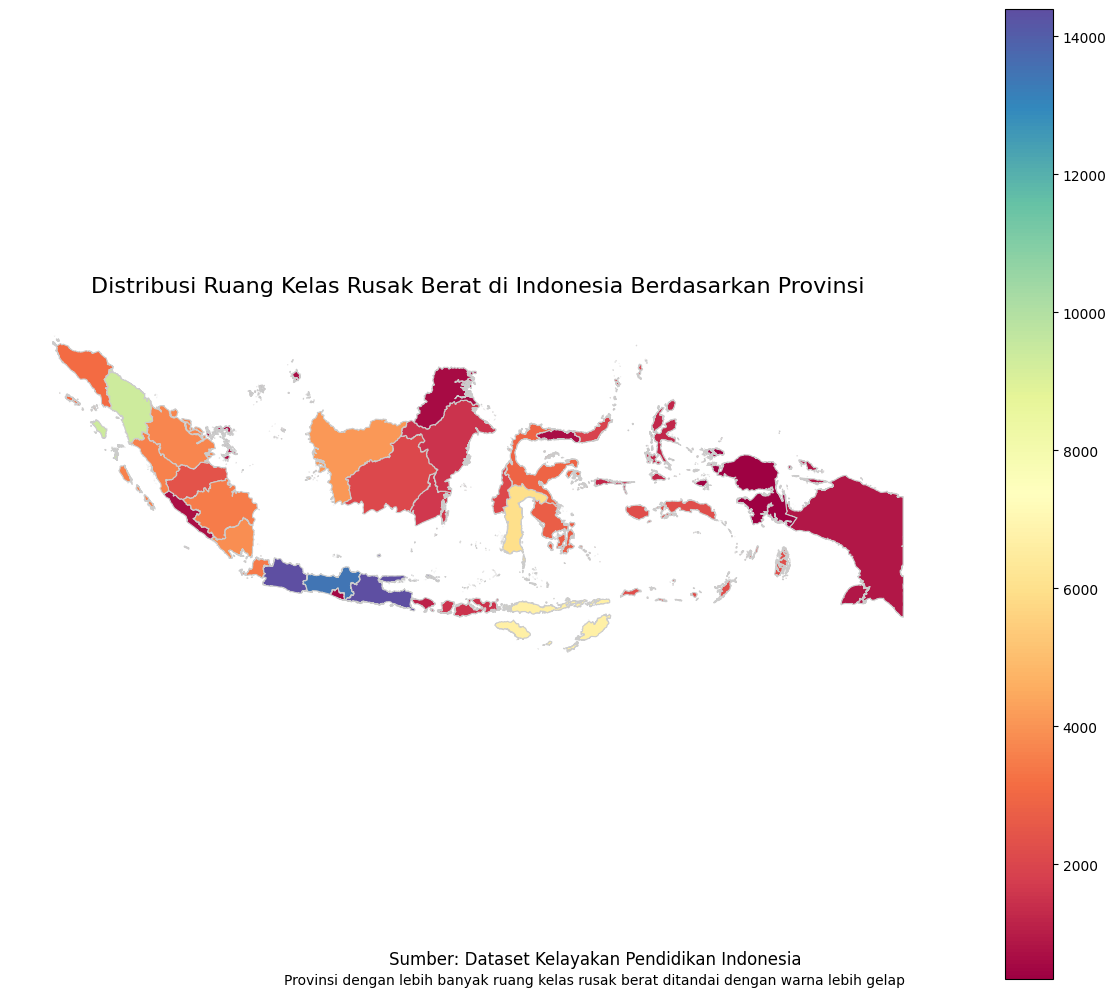

In [151]:
gdf = gpd.read_file('data/gadm41_IDN_1.shp')

gdf = gdf.rename(columns={'NAME_1': 'Provinsi'})

data_pendidikan = pd.read_csv("data/kelayakan-pendidikan-indonesia.csv")

# Menghapus awalan 'Prov.' dari kolom 'Provinsi' di dataset pendidikan
data_pendidikan['Provinsi'] = data_pendidikan['Provinsi'].str.replace("Prov. ", "")

# Mapping nama provinsi agar sesuai dengan shapefile
provinsi_mapping = {
    'D.K.I. Jakarta': 'Jakarta',
    'D.I. Yogyakarta': 'Yogyakarta',
    'Sumatera Utara': 'Sumatera Utara',
    'Jawa Barat': 'Jawa Barat',
    'Jawa Tengah': 'Jawa Tengah',
    'Jawa Timur': 'Jawa Timur',
    'Aceh': 'Aceh',
    'Sumatera Barat': 'Sumatera Barat',
    'Riau': 'Riau',
    'Jambi': 'Jambi',
    'Sumatera Selatan': 'Sumatera Selatan',
    'Lampung': 'Lampung',
    'Kalimantan Barat': 'Kalimantan Barat',
    'Kalimantan Tengah': 'Kalimantan Tengah',
    'Kalimantan Selatan': 'Kalimantan Selatan',
    'Kalimantan Timur': 'Kalimantan Timur',
    'Sulawesi Utara': 'Sulawesi Utara',
    'Sulawesi Tengah': 'Sulawesi Tengah',
    'Sulawesi Selatan': 'Sulawesi Selatan',
    'Sulawesi Tenggara': 'Sulawesi Tenggara',
    'Maluku': 'Maluku',
    'Bali': 'Bali',
    'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
    'Papua': 'Papua',
    'Bengkulu': 'Bengkulu',
    'Maluku Utara': 'Maluku Utara',
    'Banten': 'Banten',
    'Kepulauan Bangka Belitung': 'Kepulauan Bangka Belitung',
    'Gorontalo': 'Gorontalo',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Papua Barat': 'Papua Barat',
    'Sulawesi Barat': 'Sulawesi Barat',
    'Kalimantan Utara': 'Kalimantan Utara',
    'Papua Tengah': 'Papua Tengah',
    'Papua Selatan': 'Papua Selatan',
    'Papua Pegunungan': 'Papua Pegunungan',
    'Papua Barat Daya': 'Papua Barat Daya'
}

# Mengganti nama provinsi di dataset pendidikan agar sesuai dengan shapefile
data_pendidikan['Provinsi'] = data_pendidikan['Provinsi'].replace(provinsi_mapping)

provinsi_to_remove = ['Luar Negeri', 'Papua Tengah', 'Papua Selatan', 'Papua Pegunungan', 'Papua Barat Daya']
data_pendidikan_filtered = data_pendidikan[~data_pendidikan['Provinsi'].isin(provinsi_to_remove)]

# Menggabungkan shapefile dengan data pendidikan berdasarkan provinsi
merged_data = gdf.merge(data_pendidikan_filtered, on='Provinsi', how='left')

missing_geometry = merged_data[merged_data['geometry'].isna()]
if not missing_geometry.empty:
    print("Provinsi dengan geometri yang hilang:")
    print(missing_geometry['Provinsi'].tolist())

merged_data = merged_data.dropna(subset=['geometry'])

print(merged_data['Ruang kelas(rusak berat)'].describe())

# Normalisasi nilai untuk visualisasi
min_val = merged_data['Ruang kelas(rusak berat)'].min()
max_val = merged_data['Ruang kelas(rusak berat)'].max()
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)

cmap = plt.get_cmap('Spectral')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data.plot(column='Ruang kelas(rusak berat)', cmap=cmap, linewidth=0.8, ax=ax, 
                 edgecolor='0.8', norm=norm, legend=True)

plt.title('Distribusi Ruang Kelas Rusak Berat di Indonesia Berdasarkan Provinsi', fontsize=16, pad=20)

plt.figtext(0.5, 0.03, 'Sumber: Dataset Kelayakan Pendidikan Indonesia', ha='center', fontsize=12)
plt.figtext(0.5, 0.01, 'Provinsi dengan lebih banyak ruang kelas rusak berat ditandai dengan warna lebih gelap', ha='center', fontsize=10)

ax.set_axis_off()

plt.tight_layout()
plt.show()

- **Insight:** Peta distribusi ruang kelas rusak berat di Indonesia menunjukkan konsentrasi yang signifikan di beberapa provinsi, terutama di Jawa Barat, Jawa Tengah, dan Jawa Timur, yang ditandai dengan warna ungu kebiruan. Provinsi-propinsi ini menghadapi tantangan serius dalam infrastruktur pendidikan, yang dapat mempengaruhi kualitas pendidikan siswa. Variasi geografis terlihat jelas, dengan provinsi seperti Bali dan Nusa Tenggara Barat menunjukkan kondisi yang lebih baik. Temuan ini menekankan pentingnya alokasi anggaran untuk renovasi dan perbaikan infrastruktur pendidikan, serta perlunya monitoring berkelanjutan untuk memastikan semua siswa memiliki akses ke lingkungan belajar yang layak.

### Simulasi Monte Carlo untuk Memodelkan Dampak Kebijakan Pendidikan pada Pengurangan Siswa Mengulang

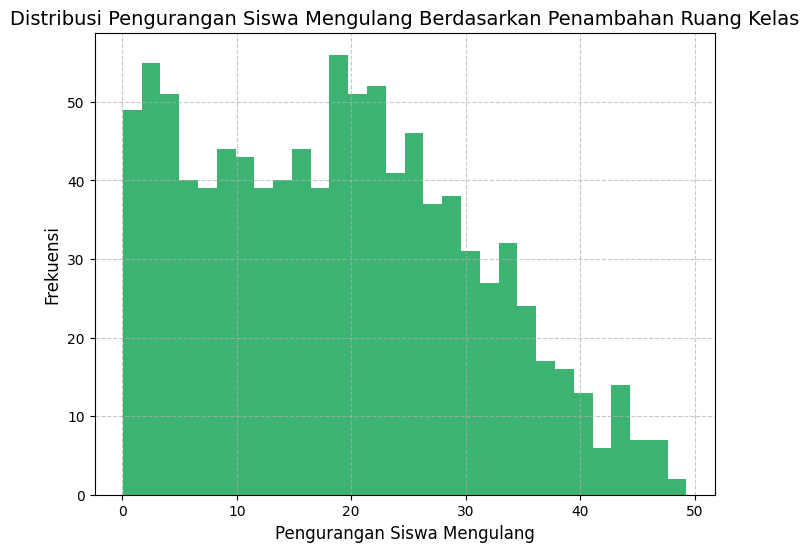

In [69]:
simulasi_hasil = []
n_simulasi = 1000
for i in range(n_simulasi):
    penambahan_kelas = np.random.uniform(0, 500)
    pengurangan_mengulang = penambahan_kelas * np.random.uniform(0.05, 0.1)
    simulasi_hasil.append(pengurangan_mengulang)

plt.figure(figsize=(8, 6))
plt.hist(simulasi_hasil, bins=30, color='mediumseagreen')
plt.title('Distribusi Pengurangan Siswa Mengulang Berdasarkan Penambahan Ruang Kelas', fontsize=14)
plt.xlabel('Pengurangan Siswa Mengulang', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


- **Insight:** Hasil simulasi ini menunjukkan bahwa penambahan ruang kelas memiliki potensi besar untuk mengurangi jumlah siswa yang mengulang, tergantung pada skala kebijakan yang diterapkan. Ini memberikan panduan bagi pembuat kebijakan tentang skala penambahan ruang kelas yang diperlukan untuk mencapai pengurangan yang signifikan.

## 9. Conclusion

1. **Pentingnya Data yang Bersih dan Terstruktur**:
   - Proses data wrangling yang dilakukan menghasilkan dataset yang bersih dan terstruktur, yang merupakan dasar penting untuk analisis yang akurat dan efektif dalam bidang pendidikan.

2. **Wawasan dari Analisis Data**:
   - Melalui Exploratory Data Analysis (EDA) dan Visualisasi Explanatory Analysis (VEA), ditemukan pola dan tren yang memberikan wawasan mendalam tentang kondisi ruang kelas di berbagai provinsi, serta perbedaan signifikan antara daerah yang lebih berkembang dan yang kurang berkembang.

3. **Identifikasi Tantangan**:
   - Hasil analisis menunjukkan bahwa beberapa provinsi menghadapi tantangan serius terkait infrastruktur pendidikan, terutama ruang kelas yang rusak, yang dapat mempengaruhi kualitas pendidikan dan keberhasilan siswa.

4. **Relevansi untuk Kebijakan Pendidikan**:
   - Data dan wawasan yang diperoleh sangat relevan bagi pembuat kebijakan, memberikan dasar untuk merumuskan strategi dan kebijakan yang lebih tepat sasaran untuk perbaikan infrastruktur pendidikan.

5. **Pentingnya Monitoring Berkelanjutan**:
   - Analisis lanjutan, termasuk simulasi dan pemodelan, menunjukkan perlunya monitoring berkelanjutan terhadap kondisi pendidikan dan dampak kebijakan yang diterapkan untuk memastikan keberhasilan dan efisiensi penggunaan sumber daya.

6. **Dukungan terhadap Akses yang Adil**:
   - Temuan ini mendukung inisiatif untuk memastikan semua siswa di Indonesia, terlepas dari lokasi geografis, memiliki akses yang adil terhadap pendidikan berkualitas, yang merupakan langkah penting untuk mencapai kesetaraan dalam pendidikan.

7. **Potensi untuk Peningkatan Kualitas Pendidikan**:
   - Dengan informasi yang tepat dan tindakan yang berbasis data, ada potensi besar untuk meningkatkan kualitas pendidikan di seluruh Indonesia, yang pada akhirnya akan berkontribusi pada pengembangan sosial dan ekonomi negara. 

**Kesimpulan Akhir:**
Secara keseluruhan, analisis yang dilakukan tidak hanya memberikan gambaran jelas mengenai kondisi pendidikan di Indonesia, tetapi juga menyajikan rekomendasi dan dasar bagi pengambilan keputusan yang lebih baik dalam perbaikan infrastruktur pendidikan, penyaluran sumber daya, dan implementasi kebijakan yang lebih efektif.